In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Excel_files\\Data 26.11.2023..xlsx')
df.head(10)


,area,sq_meters,room_number,price,heating,floor,total_floors
0,Opština Čukarica,95 m2,3.0,750€,Gas,2,2.0
1,Opština Novi Beograd,40 m2,1.5,400€,CG,1,5.0
2,Opština Novi Beograd,68 m2,3.0,1.400€,CG,7,7.0
3,Opština Vračar,84 m2,3.0,700€,CG,1,5.0
4,Opština Novi Beograd,40 m2,1.0,900€,CG,17,NaN
5,Opština Novi Beograd,75 m2,3.0,600€,CG,VPR,4.0
6,Opština Savski venac,54 m2,2.0,800€,TA,5,5.0
7,Opština Stari grad,50 m2,2.0,950€,CG,6,NaN
8,Opština Novi Beograd,80 m2,3.0,1.050€,CG,7,8.0
9,Opština Voždovac,50 m2,2.0,350€,NaN,4,NaN


In [3]:

# Including only records where apartment area appears at least 10 times
area_counts = df['area'].value_counts()
mask = df['area'].map(area_counts) >= 10
df = df[mask]

# Numerical number formating
df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
df['sq_meters'] = df['sq_meters'].str.replace(' m2', '').str.replace(',', '.')
df['room_number'] = df['room_number'].str.replace('+', '')
df['floor'] = df['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}) 
df[['price', 'sq_meters', 'room_number', 'floor']] = df[['price', 'sq_meters', 'room_number', 'floor']].astype(float)

# Formating area column
df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace('Opština ', '')

# Sorting and deleting NA records
df = df.sort_values(by=['price'], ignore_index=True)
df = df.dropna()

# Data description
df.describe()

C:\Users\marko\AppData\Local\Temp\ipykernel_10612\3773211528.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
C:\Users\marko\AppData\Local\Temp\ipykernel_10612\3773211528.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['room_number'] = df['room_number'].str.replace('+', '')


,sq_meters,room_number,price,floor,total_floors
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,62.146237,2.295983,802.122622,2.968288,6.331924
std,27.103845,0.895566,346.698731,3.052689,4.480392
min,15.000000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,60.000000,2.000000,750.000000,2.000000,5.000000
75%,72.000000,3.000000,1100.000000,4.000000,7.000000
max,320.000000,5.000000,1500.000000,24.000000,30.000000


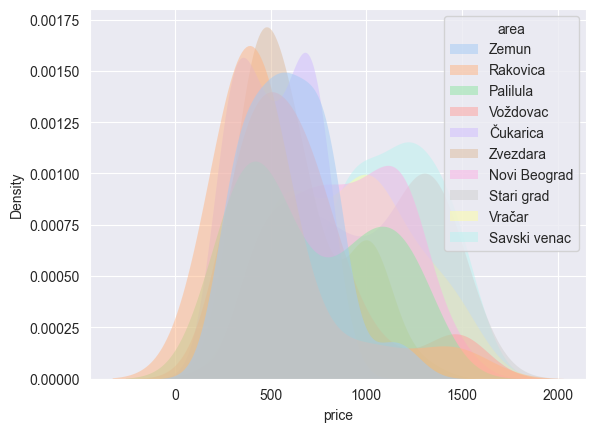

In [4]:
# Distribution check per area
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.kdeplot(
    data = df,
    x = df['price'],
    hue=df['area'],
    fill=True, 
    common_norm=False, 
    palette="pastel",
    alpha=.5, 
    linewidth=0,
)
plt.show()

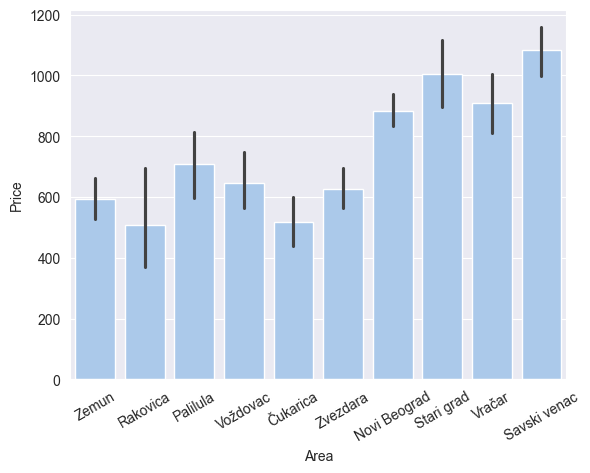

In [5]:
# Mean price per area
sns.barplot(
    data= df,
    x = df['area'],
    y = df['price'],
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

array([[<AxesSubplot:title={'center':'sq_meters'}>,
        <AxesSubplot:title={'center':'room_number'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'total_floors'}>, <AxesSubplot:>]],
      dtype=object)

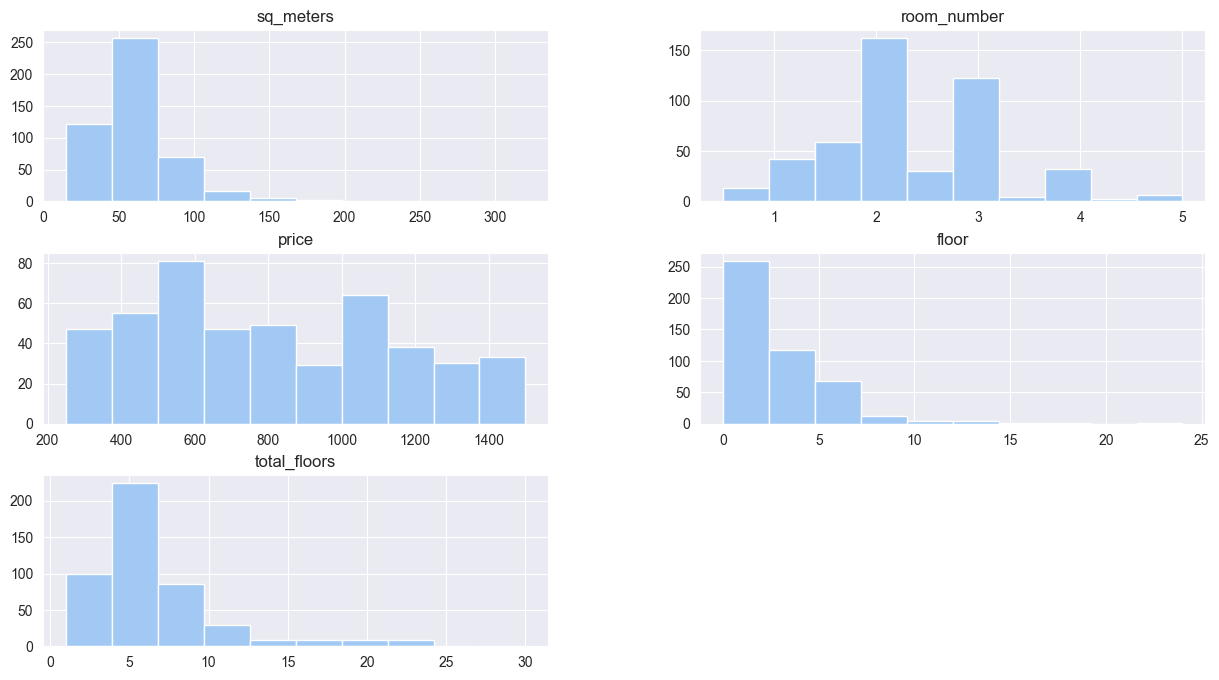

In [6]:
df.hist(figsize=(15, 8))

In [7]:
# Including only records where apartment heating type appears at least 16 times
heating_counts = df['heating'].value_counts()
mask = df['heating'].map(heating_counts) >= 16
df = df[mask]

<AxesSubplot:>

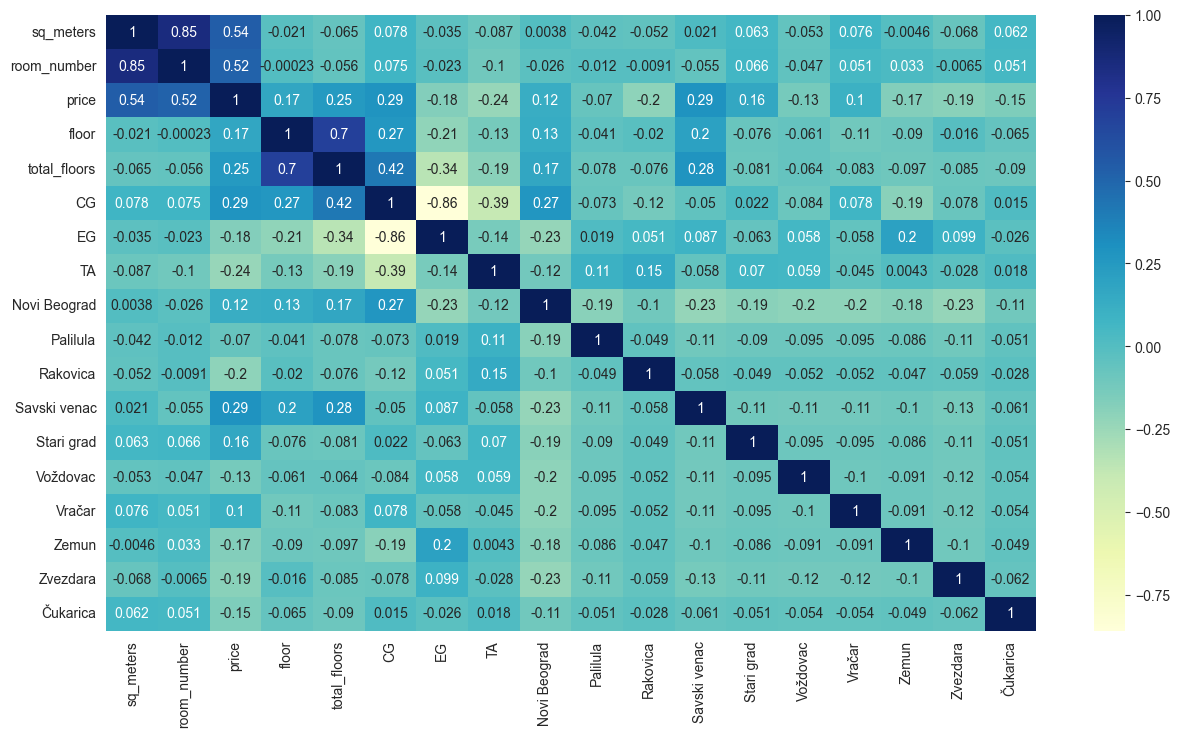

In [8]:
df_processed = df.join(pd.get_dummies(df.heating)).drop(['heating'], axis=1)
df_processed = df_processed.join(pd.get_dummies(df_processed.area)).drop(['area'], axis = 1)
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='YlGnBu')

In [9]:
df_processed.to_excel("Excel_files\\Processed data 26.11.2023..xlsx", index=False)

In [10]:
### Data cleaining
df_new = pd.read_excel('Excel_files\\Data 04.01.2024..xlsx')

# Including only records where apartment area appears at least 10 times
area_counts = df_new['area'].value_counts()
mask = df_new['area'].map(area_counts) >= 10
df_new = df_new[mask]

# Numerical number formating
df_new['price'] = df_new['price'].str.replace('€', '', regex=False).str.replace('.', '', regex=False)
df_new['sq_meters'] = df_new['sq_meters'].str.replace(' m2', '', regex=False).str.replace(',', '.', regex=False)
df_new['room_number'] = df_new['room_number'].str.replace('+', '', regex=False)
df_new['floor'] = df_new['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}, regex=False) 
df_new[['price', 'sq_meters', 'room_number', 'floor']] = df_new[['price', 'sq_meters', 'room_number', 'floor']].astype(float)
df_new['area'] = df_new['area'].astype(str)
df_new['area'] = df_new['area'].str.replace('Opština ', '', regex=False)

# Sorting and deleting all NA values
df_new = df_new.sort_values(by=['price'], ignore_index=True)
df_new = df_new.dropna()

# Data description
df_new.describe()

,sq_meters,room_number,price,floor,total_floors
count,446.000000,446.000000,446.000000,446.000000,446.000000
mean,58.115410,2.215247,756.578475,2.778027,6.096413
std,20.382927,0.846455,321.617138,2.295587,3.893196
min,3.543000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,55.000000,2.000000,700.000000,2.000000,5.000000
75%,70.000000,3.000000,1000.000000,4.000000,7.000000
max,140.000000,5.000000,1500.000000,12.000000,30.000000


In [11]:
# Avregare prices comparison for dates 26.11.2023 and 04.01.2024 per area
mean_prices_1 = df.groupby('area')['price'].mean().reset_index()
mean_prices_1 = mean_prices_1.rename(columns={'price': "price 26.11.2023"})
mean_prices_2 = df_new.groupby('area')['price'].mean().reset_index()
mean_prices_2 = mean_prices_2.rename(columns={'price': "price 04.01.2024"})
mean_prices_comp = mean_prices_1.merge(mean_prices_2, on='area', how='outer')
mean_prices_comp = mean_prices_comp.dropna()
mean_prices_comp['percentage_change'] = ((mean_prices_comp['price 04.01.2024'] - mean_prices_comp['price 26.11.2023']) / mean_prices_comp['price 26.11.2023']) * 100
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].map('{:.2f}%'.format)
print(mean_prices_comp)


           area  price 26.11.2023  price 04.01.2024 percentage_change
0  Novi Beograd        876.209677        843.809524            -3.70%
1      Palilula        729.714286        648.823529           -11.09%
3  Savski venac       1092.291667       1068.846154            -2.15%
4    Stari grad        991.714286        947.500000            -4.46%
5      Voždovac        669.846154        665.769231            -0.61%
6        Vračar        918.974359        796.341463           -13.34%
7         Zemun        600.625000        523.783784           -12.79%
8      Zvezdara        625.714286        630.402778             0.75%
9      Čukarica        498.333333        582.692308            16.93%


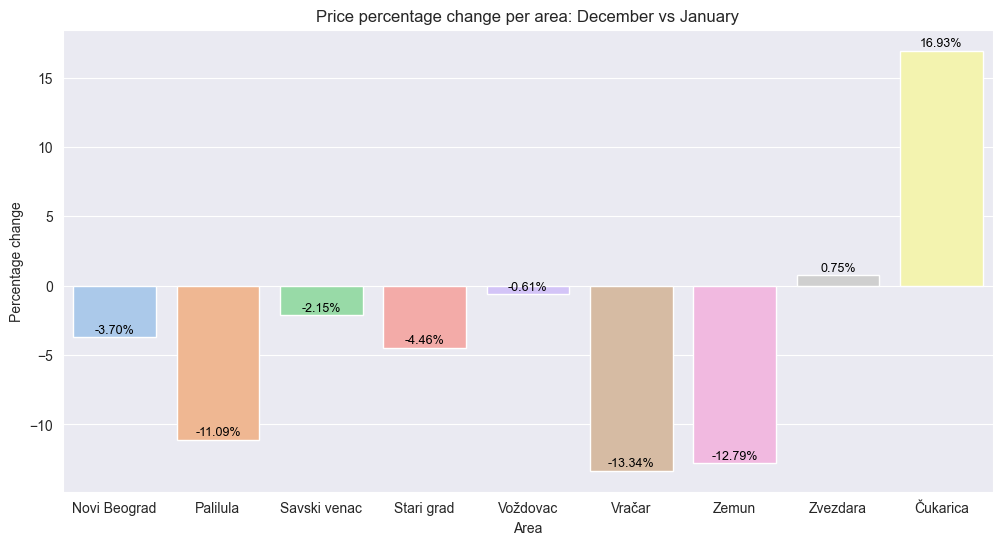

In [12]:
# Visualization of price comparison between December and January per area
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].str.replace("%", "")
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].astype(float)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y="percentage_change", data=mean_prices_comp, errorbar=None, palette="pastel", hue='area', legend=False)

plt.title("Price percentage change per area: December vs January")
plt.xlabel("Area")
plt.ylabel("Percentage change")

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

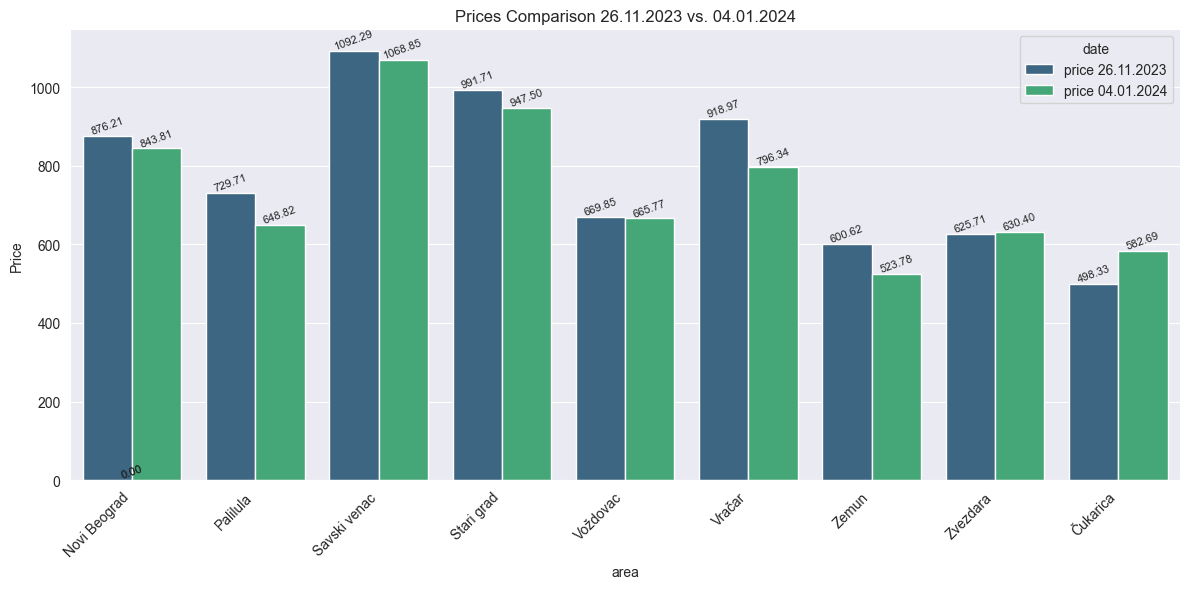

In [13]:
# Visual representation of average price change between 26.11.2023 and 04.01.2024 per area
mean_prices_comp_melted = pd.melt(mean_prices_comp[['area', 'price 26.11.2023', 'price 04.01.2024']], id_vars=['area'], var_name='date', value_name='price')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y='price', hue='date', data=mean_prices_comp_melted, palette='viridis')

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2

    ax.annotate(f'{height:.2f}', (width, height), ha='center', va='bottom', rotation=20, fontsize=8)

plt.title('Prices Comparison 26.11.2023 vs. 04.01.2024')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()